## Predictions Maps - AdaBoost Model
Team members: Mike Thisyamondal, Rajan Mamtani, Steven Trojanowski, Laura Roman
<br>Maps attributed to Laura Roman

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
data = pd.read_csv('./data/test_predicts_ada.csv')

In [4]:
data.shape

(116293, 13)

In [5]:
data['wnv_predict'].value_counts()

0.0    95877
1.0    20416
Name: wnv_predict, dtype: int64

In [6]:
data.drop("Unnamed: 0",axis=1,inplace=True)

In [7]:
data.head()

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,wnv_predict
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,0.0
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,0.0
2,3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,0.0
3,4,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX SALINARIUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,0.0
4,5,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX TERRITANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,0.0


In [8]:
from datetime import datetime

In [9]:
#data.dtypes

In [10]:
data['Date'] = pd.to_datetime(data['Date'])

In [11]:
data.set_index('Date',inplace=True)

In [12]:
data.head()

,Id,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,wnv_predict
Date,,,,,,,,,,,
2008-06-11,1,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,0.0
2008-06-11,2,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,0.0
2008-06-11,3,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,0.0
2008-06-11,4,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX SALINARIUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,0.0
2008-06-11,5,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX TERRITANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,0.0


WNV Positive and Negative filters

In [13]:
place = pd.DataFrame(data[['Latitude','Longitude','wnv_predict']])

place['wnv_predict'].value_counts()
place['year'] = place.index.year

In [14]:
place.head()

,Latitude,Longitude,wnv_predict,year
Date,,,,
2008-06-11,41.95469,-87.800991,0.0,2008
2008-06-11,41.95469,-87.800991,0.0,2008
2008-06-11,41.95469,-87.800991,0.0,2008
2008-06-11,41.95469,-87.800991,0.0,2008
2008-06-11,41.95469,-87.800991,0.0,2008


In [15]:
wnv_pos = place['wnv_predict']==1

In [16]:
place_wnv = place[wnv_pos]

In [17]:
place_wnv.index.year

Int64Index([2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008,
            ...
            2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014],
           dtype='int64', name='Date', length=20416)

In [18]:
uniq=place_wnv.groupby(['Latitude','Longitude','year'],as_index=False).sum()
uniq#.head(30)

,Latitude,Longitude,year,wnv_predict
0,41.644612,-87.604498,2008,43.0
1,41.644612,-87.604498,2010,42.0
2,41.644612,-87.604498,2012,44.0
3,41.644612,-87.604498,2014,17.0
4,41.646541,-87.543762,2008,43.0
5,41.646541,-87.543762,2010,42.0
6,41.646541,-87.543762,2012,44.0
7,41.646541,-87.543762,2014,17.0
8,41.659112,-87.538693,2008,49.0
9,41.659112,-87.538693,2010,42.0


In [19]:
top_5_ada=uniq[uniq['year']==2014].sort_values("wnv_predict",ascending=False)

In [20]:
top_5_ada.shape

(137, 4)

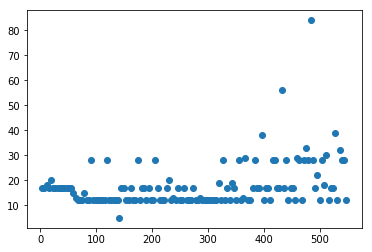

In [21]:
plt.scatter(top_5_ada.index, top_5_ada['wnv_predict'])

/Users/Roman/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


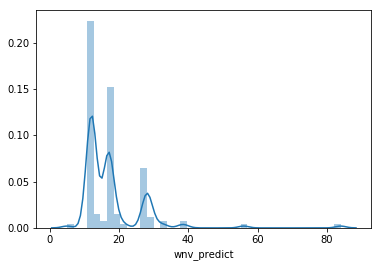

In [22]:
sns.distplot(top_5_ada['wnv_predict'])

In [23]:
uniq[uniq['year']==2008]['Latitude'][0:5]

0     41.644612
4     41.646541
8     41.659112
12    41.662014
16    41.673408
Name: Latitude, dtype: float64

In [24]:
uniq['wnv_predict'].min(),uniq['wnv_predict'].max()

(5.0, 138.0)

In [25]:
wnv_lat = uniq[uniq['year']==2008]['Latitude'].values
wnv_long = uniq[uniq['year']==2008]['Longitude'].values

In [26]:
data.index.max(),data.index.min()

(Timestamp('2014-10-02 00:00:00'), Timestamp('2008-06-11 00:00:00'))

In [27]:
from bokeh.io import output_notebook, show
output_notebook()
import os
from bokeh.models import GMapOptions
from bokeh.plotting import gmap
from bokeh.models import LinearInterpolator

Loading BokehJS ...

### WNV Positive mosquito volume weighted location maps, by year 2008-2014

In [28]:
map_options = GMapOptions(lat=41.8781, lng=-87.6298, map_type="roadmap", zoom=10)

# Replace the value below with your personal API key:
api_key = "Google API Key"

size_mapper = LinearInterpolator(x=[uniq['wnv_predict'].min(),uniq['wnv_predict'].max()],
                                y=[1,140])
p = gmap(api_key, map_options, title="Chicago 2008 West Nile Virus Predictions")

data = dict(lat=uniq[uniq['year']==2008]['Latitude'].values,
          lon=uniq[uniq['year']==2008]['Longitude'].values,
           wnv_predict=uniq[uniq['year']==2008]['wnv_predict'])


p.circle(x="lon", y="lat", fill_color="gold", fill_alpha=0.8, source=data,
         size={'field':'wnv_predict','transform':size_mapper})

show(p)

In [29]:
map_options = GMapOptions(lat=41.8781, lng=-87.6298, map_type="roadmap", zoom=10)

# Replace the value below with your personal API key:
api_key = "Google API Key"

size_mapper = LinearInterpolator(x=[uniq['wnv_predict'].min(),uniq['wnv_predict'].max()],
                                y=[1,140])
p = gmap(api_key, map_options, title="Chicago 2010 West Nile Virus Predictions")

data = dict(lat=uniq[uniq['year']==2010]['Latitude'].values,
          lon=uniq[uniq['year']==2010]['Longitude'].values,
           wnv_predict=uniq[uniq['year']==2010]['wnv_predict'])


p.circle(x="lon", y="lat", fill_color="orange", fill_alpha=0.8, source=data,
         size={'field':'wnv_predict','transform':size_mapper})

show(p)

In [30]:
map_options = GMapOptions(lat=41.8781, lng=-87.6298, map_type="roadmap", zoom=10)

# Replace the value below with your personal API key:
api_key = "Google API Key"

size_mapper = LinearInterpolator(x=[uniq['wnv_predict'].min(),uniq['wnv_predict'].max()],
                                y=[1,140])
p = gmap(api_key, map_options, title="Chicago 2012 West Nile Virus Predictions")

data = dict(lat=uniq[uniq['year']==2012]['Latitude'].values,
          lon=uniq[uniq['year']==2012]['Longitude'].values,
           wnv_predict=uniq[uniq['year']==2012]['wnv_predict'])


p.circle(x="lon", y="lat", fill_color="coral", fill_alpha=0.8, source=data,
         size={'field':'wnv_predict','transform':size_mapper})

show(p)

In [31]:
map_options = GMapOptions(lat=41.8781, lng=-87.6298, map_type="roadmap", zoom=10)

# Replace the value below with your personal API key:
api_key = "Google API Key"

size_mapper = LinearInterpolator(x=[uniq['wnv_predict'].min(),uniq['wnv_predict'].max()],
                                y=[1,140])
p = gmap(api_key, map_options, title="Chicago 2014 West Nile Virus Predictions")

data = dict(lat=uniq[uniq['year']==2014]['Latitude'].values,
          lon=uniq[uniq['year']==2014]['Longitude'].values,
           wnv_predict=uniq[uniq['year']==2014]['wnv_predict'])


p.circle(x="lon", y="lat", fill_color="indianred", fill_alpha=0.8, source=data,
         size={'field':'wnv_predict','transform':size_mapper})

show(p)